# Program description: 
This model utilizes an LSTM, a class of artificial recurrent neural network to predict the closing stock price of 20 companies using historical stock prices.
# Objective:
Honors Statistics & Multivariable Calculus final projects
# By:
Claire Chen
# Completion Date:
May 20, 2021
# Source:
Computer Science’s Youtube video “Stock Price Prediction Using Python & Machine Learning”
# Credits:
Jaiv Doshi & Andy Yu for help in machine learning and programming
Ms. Sage for help in statistics and data analysis
The Alpha Academy by Alpha Vantage’s article on “Predicting Stock Prices with Deep Neural Networks”
GitHub
StackOverflow
Towards Data Science
3blue1brown’s Youtube series on deep learning



In [ ]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
from numpy import array
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

KeyboardInterrupt: ignored

In [ ]:
# Find the stock (use tickers!) and specify the time interval
df = web.DataReader('BEN',data_source='yahoo',start='2003-01-01',end='2021-05-25')
# Show stock prices
df

In [ ]:
df.shape

In [ ]:
# Plot the historical stock prices (just for visualization purposes)
plt.figure(figsize=(20,10))
plt.title('Historical Closing Prices')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock Prices in US$',fontsize=20)
plt.show()

In [ ]:
# Create a new dataframe with the 'Close' column only
data = df.filter(['Close'])
# Convert the dataframe into a numpy array
dataset = data.values
# Find the number of rows of the array for training the model
trainingDataNumOfRows =  math.ceil(len(dataset)) * .8
# The math.ceil command does not seem to work properly 
# so I'm using it twice to resolve the issue
roundedNumOfRows = math.ceil(trainingDataNumOfRows)
roundedNumOfRows

In [ ]:
import numpy as np
# Scale the training data
scaler = MinMaxScaler(feature_range =(0,4))
scaledData = scaler.fit_transform(dataset)

scaledData

scaledDataInt = []

for j in range(0,len(scaledData),1):
 scaledDataInt.append([int(scaledData[j])])

scaledDataInt = np.array(scaledDataInt)
scaledDataInt

In [ ]:
# Create the *scaled* training dataset ;)
trainingData = scaledDataInt[0:roundedNumOfRows,0]
# Split the training data into xVariable and yVariable datasets for training!!!
xVariable = []
yVariable = []

# Create a loop
for i in range(60,len(trainingData)):
    xVariable.append([trainingData[i-60:i]])
    yVariable.append([trainingData[i]])
if i<=60:
    print(xVariable)
    print(yVariable)
    print()

In [ ]:
import numpy as np
# Convert the xVariable and yVariable data into numpy arrays
xInNumpy, yInNumpy = np.array(xVariable),np.array(yVariable)
xInNumpy, yInNumpy

In [ ]:
# Reshape the data
xInNumpy = array(xInNumpy).reshape(xInNumpy.shape[0],60,1)

xInNumpy.shape

In [ ]:
# Build the LSTM model (hooray!)
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(xInNumpy.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
print(model.summary())

In [ ]:
# Train the model
model.fit(xInNumpy,yInNumpy,batch_size=1,epochs=1)

3645/3645 [==============================] - 110s 25ms/step - loss: 0.0900


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fd4b0ad9680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


In [ ]:
# Create the testing dataset
# Create a new array containing scaled values from index
testData = scaledData[roundedNumOfRows - 60:,:]
# Create the datasets xTest and yTest
xTest = []
yTest = dataset[roundedNumOfRows,:]
# Looooop again! Store the testing data in an aray
for i in range(60,len(testData)):
  xTest.append(testData[i-60:i,0])

In [ ]:
# Convert the testing data into a numpy array
xTest = np.array(xTest)

In [ ]:
# Reshape testing data
xTest = np.reshape(xTest,(xTest.shape[0],xTest.shape[1], 1))

In [ ]:
# Obtain the model's predicted stock prices
predictions = model.predict(xTest)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Find the root mean squared error (RMSE!!!!)
rmse = np.sqrt(np.mean(((predictions - yTest)**2)))
rmse

15.249361160128494

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


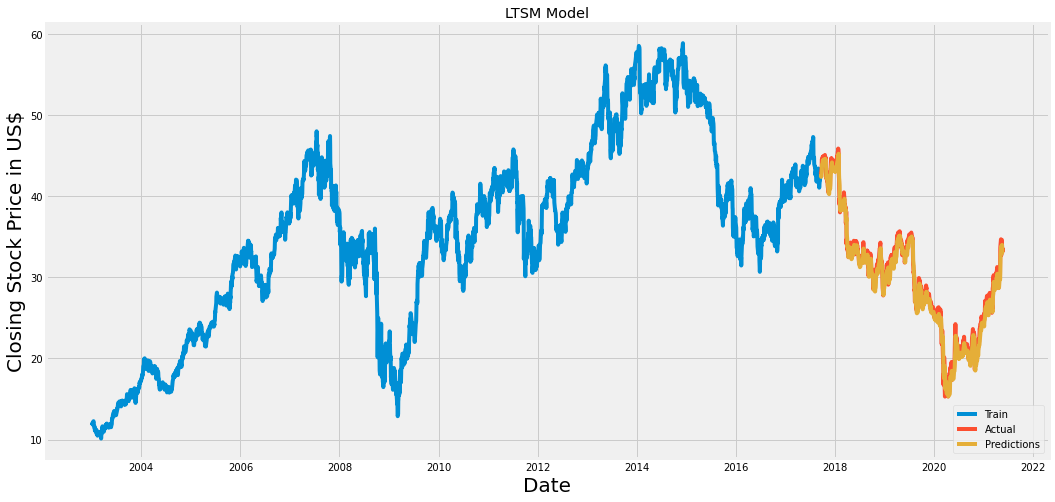

In [ ]:
# Plot the data
train = data[:roundedNumOfRows]
actual = data[roundedNumOfRows:]
actual['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LTSM Model')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Closing Stock Price in US$',fontsize=20)
plt.plot(train['Close'])
plt.plot(actual[['Close','Predictions']])
plt.legend(['Train','Actual','Predictions'],loc='lower right')
plt.show()

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['msle'])
history = model.fit(xInNumpy,yInNumpy,epochs=200,verbose=2)
plt.plot(history.history['loss'])
plt.title('Loss as a Function of Epochs')
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)

In [ ]:
# Show the actual and predicted prices
actual

In [ ]:
# Price quote (which is the same as the dataframe)
priceQuote = df
# Create a new dataframe
newDataFrame = priceQuote.filter(['Close'])
# Obtain historical stock prices and convert the dataframe to an awway
historicalPrices = newDataFrame[-60:].values
# Scale the data into values
historicalPricesScaled = scaler.transform(historicalPrices)
# Create an empty list
xTest = []
# Append the historical stock prices to the list
xTest.append(historicalPricesScaled)
# Convert the xTest dataset to a numpy array


In [ ]:
from google.colab import data_table
data_table.DataTable(actual, include_index=False, num_rows_per_page=450)